# Trabalho Final de Introdução à Computação Numérica (2025.2)

**Dupla:**
* Daniel Rossano Piccoli de Oliveira
* Davi de Lacerda Iecin


## 0. Importação de Bibliotecas
Rodar esta célula para carregar as ferramentas.

```python
# Se estiver rodando no google colab, descomente a linha abaixo:
# !pip install numpy matplotlib sympy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.abc import x
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

Gráfico e animação de teste:

In [1]:
#teste 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Configura a "tela" do gráfico
fig, ax = plt.subplots()
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.5, 1.5)
linha, = ax.plot([], [], lw=2)

# Função que inicializa o fundo (limpo)
def init():
    linha.set_data([], [])
    return linha,

# Função que desenha cada quadro (frame)
def update(frame):
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x - 0.1 * frame) # O frame muda a fase da onda, fazendo ela "andar"
    linha.set_data(x, y)
    return linha,

# Cria a animação
anim = FuncAnimation(fig, update, frames=100, init_func=init, blit=True)

# O COMANDO MÁGICO: Converte para HTML5 para aparecer no Notebook
plt.close() # Evita plotar uma imagem estática duplicada
HTML(anim.to_jshtml())

## 1. Método de interpolação de Lagrange:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def interpolacao_lagrange(pontos_x, pontos_y):
    """
    Implementação do método de Lagrande.

    O polinômio interpolador P(x) é dado pela combinação linear:
    P(x) = sum(y_i) * L_i(x)) para i de 0 a n, onde L_i(x) são os 
    polinômios de base de Lagrange definidos pelo produtório:
    L_i(x) = prod((x - x_j) / (x_i - x_j)) para j != i.

    Parâmetros:
        pontos_x (list/array): Coordenadas x dos pontos conhecidos (nós)
        pontos_y (list/array): Coordenadas y dos pontos conhecidos (valores da função)

    Saída:
        expressao_final (sympy.Expr): A expressão simbólica exata do polinômio
        funcao_numerica (function): Uma função vetorizada para cálculos nuuméricos e plots
    """

        # é usado o SymPy para manipular x e permitir a construção algébrica da equação antes de calcular os valores numéricos
    x = sp.symbols('x') 

    # n determina o grau máximo do polinômio
    n = len(pontos_x)

    # somatório final dos termos y_i * L_i(x) inicializado
    polinomio = 0


    # loop que representa o somatório da fóruma de Lagrange
    for i in range(n):
        L_i = 1 # inicializa o polinômio da base L_i(x) como 1 para que seja neutro na multiplicação

        # loop que contrói o produtório para o termo L_i
        for j in range(n):
            if i != j: # para evitar divisão por zero (x_i - x_i) e garantir que L_i(x_i) = 1
                L_i = L_i * (x - pontos_x[j]) / (pontos_x[i] - pontos_x[j])

        polinomio = polinomio + pontos_y[i] * L_i

    # simplificação algébrica que agrupa os termos semelhantes
    expressao_final = sp.simplify(polinomio)

    # transforma a expressão do SymPy em uma função Python
    funcao_numerica = sp.lambdify(x, expressao_final, modules=['numpy'])
    
    return expressao_final, funcao_numerica

# Problemas resolvidos com interpolação:

## Problema 1: Interpolando 3 pontos aleatórios:

O Polinômio de Lagrage f(x) é: 
     2           
  5⋅x    17⋅x    
- ──── + ──── + 1
   6      6      


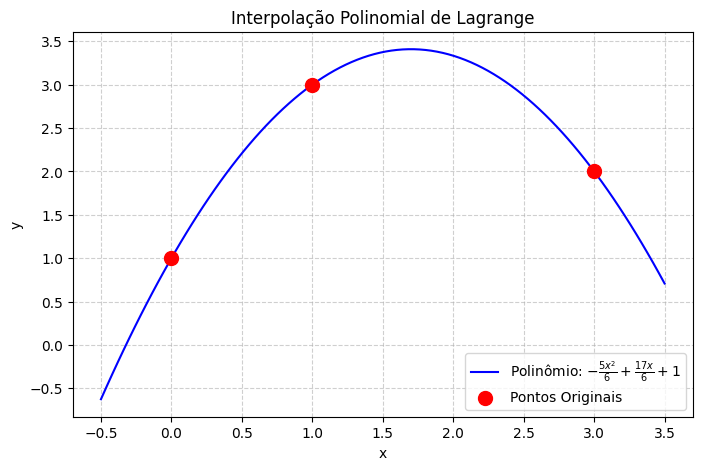

In [3]:
x_input = [0, 1, 3]
y_input = [1, 3, 2]

equacao, funcao = interpolacao_lagrange(x_input, y_input)
print("O Polinômio de Lagrage f(x) é: ")
sp.pprint(equacao)

x_plot = np.linspace(min(x_input) - 0.5, max(x_input) + 0.5, 100)
y_plot = funcao(x_plot)

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label=f'Polinômio: ${sp.latex(equacao)}$', color='blue')
plt.scatter(x_input, y_input, color='red', s=100, zorder=5, label='Pontos Originais')
plt.title("Interpolação Polinomial de Lagrange")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Problema 2: Trajetória de Pulo

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
x_pulo = [0, 2, 4]
y_pulo = [0, 10, 0]
eq_pulo, func_pulo = interpolacao_lagrange(x_pulo, y_pulo)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-1, 12)

ax.axhline(0, color='black', linewidth=3)
x_fundo = np.linspace(0, 4, 100)
ax.plot(x_fundo, func_pulo(x_fundo), 'g--', alpha=0.3, label='Trajetória Prevista')

personagem, = ax.plot([], [], 'ro', markersize=15, zorder=5, label='Player')
ax.legend(loc='upper right')
ax.set_title("Simulação de salto com Lagrange")
ax.grid(True, linestyle=':', alpha=0.5)

def init():
    personagem.set_data([], [])
    return personagem,

def update(frame):
    x = frame
    y = func_pulo(x)

    personagem.set_data([x], [y])
    return personagem,

frames_x = np.linspace(0, 4, 60)
anim = FuncAnimation(fig, update, frames=frames_x, init_func=init, blit=True, interval=50)

plt.close()
HTML(anim.to_jshtml())

## Problema 3: Criptografia de Shamir

In [5]:
x_cripto = [1, 3, 5]
y_cripto = [12, 54, 132]

eq_cripto, func_cripto = interpolacao_lagrange(x_cripto, y_cripto)

print("Polinômio Reconstrutor: ")
sp.pprint(eq_cripto)

segredo = func_cripto(0)
print(f"\nO segredo revelado é: {int(segredo)}")

Polinômio Reconstrutor: 
   2          
9⋅x          9
──── + 3⋅x + ─
 2           2

O segredo revelado é: 4


## 2. Método de Interpolação Numérica com Trapézio:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_trapezio(f, a, b, n):
    """
    Implementação da regra do trapézio para integração numérica
    A integração definida de f(x) entre a e b é aproximada pela soma 
    das áreas de n trapézios de largura h.
    Fórmula: I = (h/2) * [f(x_0) + 2 * sum(f(x_i)) + f(x_n)]

    Parâmetros:
        f (function) -> Função matemárica a ser integrada
        a (float) -> Limite inferior da integração
        b (float) -> Limite superior da integração
        n (int) -> Número de subintervalos

    Output:
        integral (float) -> Valor numérico aproximado da área
        x_vals (array) -> Pontos x usados na discretização
        y_vals (array) -> Valores de f(x) calculados
    
    """

    if n <= 0:
        raise ValueError("Número de intervalos n deve ser positivo")
    
    h = (b - a) / n # Cálculo da largura da base de cada trapézio

    # Criado array com n + 1 pontos igualmente espaçados entre a e b
    x_vals = np.linspace(a, b, n+1) 

    # Aplica a função f em todos os pontos de uma vez
    y_vals = f(x_vals)

    # Aplicação da fórmula do trapézio
    soma_pontas = y_vals[0] + y_vals[-1]
    soma_meio = 2 * np.sum(y_vals[1:-1])
    integral = (h / 2) * (soma_pontas + soma_meio)

    return integral, x_vals, y_vals

# Problemas resolvidos com trapézio

## Problema 1: Cálculo da aproximação da integral de sin(x) de 0 a π

In [7]:
# valor exato conhecido: -cos(π) - (-cos(0)) = 1 - (-1) = 2

f1 = lambda x: np.sin(x) # Função definida

a1, b1 = 0, np.pi # Intervalos [0, π]
n1 = 10 # Número de trapézios

# Cálculo
resultado1, x1, y1 = metodo_trapezio(f1, a1, b1, n1)

print(f"Função Seno:")
print(f"Resultado aproximado (n={n1}): {resultado1:.6f}")
print(f"Resultado exato: 2.000000")
print(f"Erro absoluto: {abs(2 - resultado1):.6f}")

Função Seno:
Resultado aproximado (n=10): 1.983524
Resultado exato: 2.000000
Erro absoluto: 0.016476


## Problema 2: Cálculo de trabalho

In [8]:
# Trabalho é a integral da Força em relação à distância
# Considerando um elástico sendo esticado, 
# a função da força: f(x) = 100 * x * e^(-x) (Força aumenta e depois diminui)

def forca_elastica(x):
    return 100 * x * np.exp(-x)

a2, b2 = 0, 5 # Intervalo -> estica de 0 a 5 metros
n2 = 50 # Número de trapézios

trabalho, x2, y2 = metodo_trapezio(forca_elastica, a2, b2, n2)

print(f"\nElástico:")
print(f"Trabalho realizado para deslocar de {a2}m a {b2}m:")
print(f"W = {trabalho:.4f} Joules")


Elástico:
Trabalho realizado para deslocar de 0m a 5m:
W = 95.8717 Joules


## Problema 3: Probabilidade

In [9]:
# Calcular a probabilidade de uma variável aleatória cair entre -1 e 1 desvios padrões

def normal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

a3, b3 = -1, 1
n3 = 100

probabilidade, x3, y3 = metodo_trapezio(normal_pdf, a3, b3, n3)

print(f"\n Estatística: ")
print(f"Probabilidade P({a3} <= Z <= {b3}): {probabilidade:.2%}")


 Estatística: 
Probabilidade P(-1 <= Z <= 1): 68.27%


# 3. Método das Diferenças Finitas

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_edo(f, y0, t0, tf, h):
    """
    Resolve uma equação diferencial ordinária pelo método de Euler

    Aproxima a derivada dy/dt = (y[i+1] - y[i]) / h
    Isolando y[i+1] tem-se y[i+1] = y[i] + h * f(t[i], y[i])

    Parâmetros:
        f(function) -> Função derivada dy/dt = f(t, y)
        y0(float) -> Condição inicial (y quando t = t0)
        t0(float) -> Tempo inicial
        tf(float) -> Tempo final
        h(float) -> Passo de tempo

    Output:
        t_vals(array) -> Vetor de tempo
        y_vals(array) -> Vetor com solução aproximada de y
     """
    
    t_vals = np.arange(t0, tf + h, h) # Vetor de tempo de t0 a tf com passos de h

    y_vals = np.zeros(len(t_vals)) # Vetor de y preenchido com zeros do mesmo tamanho de t

    y_vals[0] = y0 # Condição inicial

    for i in range(len(t_vals) - 1):
        derivada = f(t_vals[i], y_vals[i]) # Derivada atual
        y_vals[i+1] = y_vals[i] + h * derivada # Passo de Euler (y_novo = y_atual + passo * inclinação)

    return t_vals, y_vals

## Problemas resolvidos com EDOs

## Problema 1: Crescimento populacional

In [11]:
# Crescimento de bactérias
# Equação: dP/dt = 0.5 * P (cresce 50% por unidade de tempo)
#P(0) = 10 bactérias

def crescimento_bacterias(t, P):
    k = 0.5 # Taxa de crescimento
    return k * P

# Resolvido de 0 a 10 segundos com passo de 0.1s
t1, p1 = metodo_edo(crescimento_bacterias, y0=10, t0=0, tf=10, h=0.1)

print("Popuação fina estimada: ", int(p1[-1]))

Popuação fina estimada:  1315


## Problema 2: Resfriamento de café

Temperatura após minutos60.0 minutos: 25.12ºC


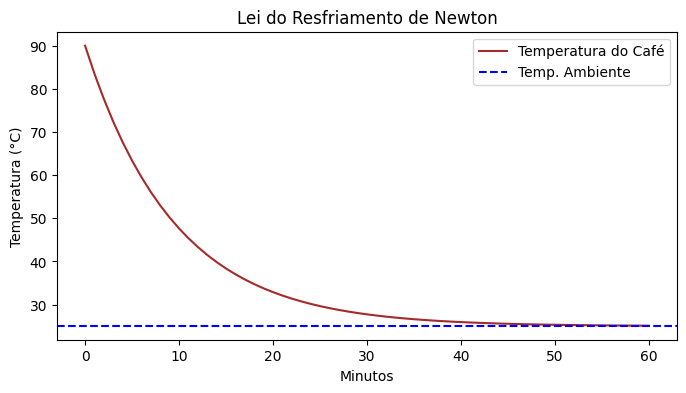

In [12]:
# Equação: dT/dt = -k * (T - T_ambiente)
#T(0) = 90ºC (café ve==fervendo), T_ambiente = 25ºC

def resfriamento(t, T):
    k = 0.1 # Constante térmica da xícara
    T_amb = 25 
    return -k * (T - T_amb)

# Resolvido por 60 minutos
t2, temp2 = metodo_edo(resfriamento, y0=90, t0=0, tf=60, h=1.0)

print (f"Temperatura após minutos{t2[-1]:.1f} minutos: {temp2[-1]:.2f}ºC")

plt.figure(figsize=(8, 4))
plt.plot(t2, temp2, label='Temperatura do Café', color='brown')
plt.axhline(25, color='blue', linestyle='--', label='Temp. Ambiente')
plt.title("Lei do Resfriamento de Newton")
plt.xlabel("Minutos")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()

## Problema 3: Salto de paraquedas

In [14]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
g = 9.8 # Gravidade
m = 80 # Massa do paraquedista em kg
k = 0.2 # Coeficiente de resistência do ar

# O método das EDOs é usado para calcular a posição (y) e a velovidade (v)
dt = 0.1 # Passo de tempo (h)
t_max = 20 # Tempo total simulação
passos = int(t_max / dt)

tempos = np.linspace(0, t_max, passos)
velocidades = np.zeros(passos)
alturas = np.zeros(passos)

# Condições iniciais
velocidades[0] = 0 # Começa parado
alturas[0] = 500 # Salta de 500 metros

for i in range(passos - 1):
    v = velocidades[i]
    h_atual = alturas[i]

    aceleracao = g - (k/m) * v**2 
    velocidades[i+1] = v + dt * aceleracao # Atualiza a velocidade
    alturas[i+1] = h_atual - dt * v # Atualiza a posição

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(0, 550) # Do chão (0) até acima do salto (550)

# Elementos do Gráfico
ax.axhline(0, color='green', linewidth=5, label='Chão') # Chão
paraquedista, = ax.plot([], [], 'bo', markersize=10, label='Paraquedista')
texto_info = ax.text(-9, 520, '', fontsize=10)

ax.set_title("Simulação: Queda com Resistência do Ar")
ax.legend()
ax.grid(True)

def init():
    paraquedista.set_data([], [])
    texto_info.set_text('')
    return paraquedista, texto_info

def update(frame):
    # 'frame' é o índice do array
    y = alturas[frame]
    v = velocidades[frame]
    
    # O paraquedista cai apenas no eixo Y (X fixo em 0)
    paraquedista.set_data([0], [y])
    
    # Mostra altura e velocidade em tempo real
    texto_info.set_text(f'Tempo: {tempos[frame]:.1f}s\nAlt: {y:.1f}m\nVel: {v:.1f}m/s')
    
    # Para a animação se atingir o chão
    if y <= 0:
        paraquedista.set_data([0], [0])
        
    return paraquedista, texto_info

# Cria animação (pulamos alguns frames '::5' para o vídeo não ficar muito longo)
anim_paraquedas = FuncAnimation(fig, update, frames=range(0, passos, 5), init_func=init, blit=True)

plt.close()
HTML(anim_paraquedas.to_jshtml())
